DataSet Link: 

https://www.kaggle.com/code/malik12345/breast-cancer-detection-using-ml/input


This data set is taken from https://data.world/health/breast-cancer-wisconsin by the Donor: Nick Street and the Source: UCI - Machine Learning Repository.

Topic: Breat Cancer Detection using ML methods

#Some definition in this project:
1. Breast Cancer
2. Two main type of Breast Cancer:



## Motivation

I choose this topic because I heard so many cases surroding me about this disease. For now, there are many 





   

## My goal


I hope I can learn more from this project and improve the data mining techniques and optimize the algorithms for this model to let the prediction and detection is more presisely. Also it is a good chance to read research papers which are related with this topic, it should be benifit to understand the domain concepts and techonologies for Machines Learning and NLP course.

Here are my reading papers list:




## Methods presented in these paper








* In the paper tissue slices of 162 patients were used all having IDC (113 used for training and 49 for validation)
* One pathologist was used to determine regions of IDC given a tissue slice 
* evaluation metric: F1 score and balanced accuracy


* My goal: Given a patient and a patch of a tissue slice predict wheather it contains IDC or not.
    
    * 3 possibilities: healthy tissue, IDC, another subtype of breast cancer
    * improve the  model performance and upgrade the data transforme part.
    
    



## Table of contents



# **1. Set up the enviroment and necessary libraries .**

In [14]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR, CyclicLR
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight


from glob import glob
from skimage.io import imread
from os import listdir

import time
import copy
from tqdm import tqdm_notebook as tqdm

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
import pandas as pd
import os

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=cfda792245f0334b8ec263f266edc37eaa764d2839bf1374f4ca0598a53246d5
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operatio

In [17]:
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Stage 1: data read and process: 

Read data from persnal google drive
Check how to read data from google drive and create the data frame

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
import pandas as pd

# replace "/content/drive/My Drive" with the path to the directory containing your dataset
path = "/content/drive/My Drive/data/data.csv"

# read the dataset using pandas
df = pd.read_csv(path)



Play Around and take a look of data simple: there are 5 rows and 32 columns

In [46]:
# take a look
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:

# check the columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [48]:
# check the numbers of columns
len(df.columns)

32

In [49]:
# get data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [50]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [61]:
# use groupby to formatted data
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [62]:
# all data type is float. if not, print message
for i in df:
    try:
        i = float(i)
        print(i)
    except:
        print("Invalid data.")

Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.


In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [91]:
import pandas as pd

# replace "/content/drive/My Drive" with the path to the directory containing your dataset
path = "/content/drive/My Drive/data/data.csv"

# read the dataset using pandas
df = pd.read_csv(path)


In [92]:
# show head of two data
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [93]:

# drop some unnecessary feature, such as 'ID'
df.drop("id",axis=1,inplace=True)

In [27]:
# prunt some necessay constant value for the data set.
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean']
-----------------------------------
['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se']
------------------------------------
['fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst']


In [28]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [113]:
df.describe() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,0.0,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,NaN,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: ylabel='count'>

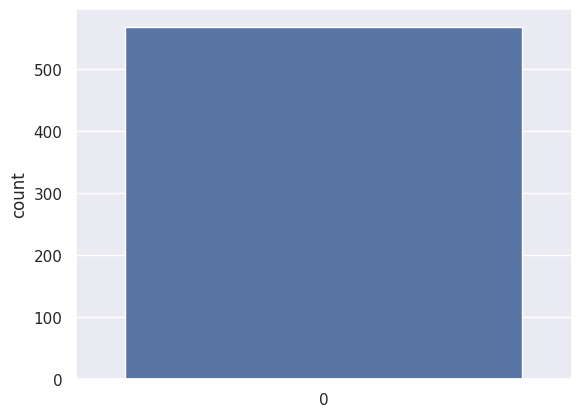

In [29]:
# display the data as two demension.( here is the issure, can't find a good fit size to display)
sns.countplot(df['diagnosis'],label="Count")

<Axes: >

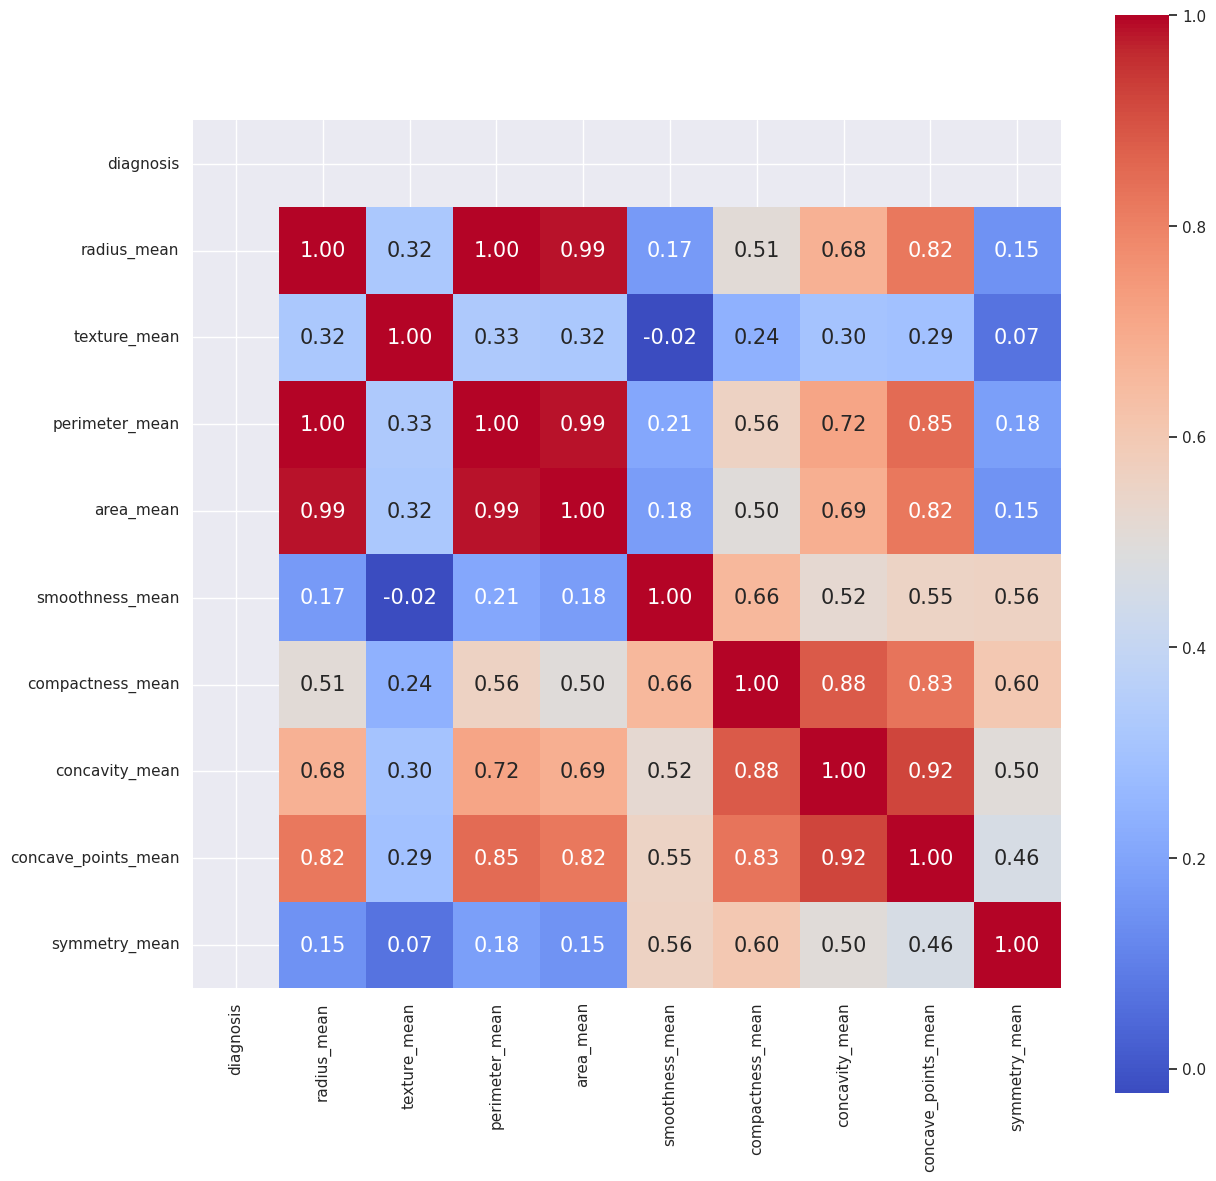

In [33]:
# using  Pandas library and Seaborn library in Python to create a heatmap of a correlation matrix.

# 1)Selects a subset of columns from a Pandas DataFrame called 'df' using the variable 'features_mean'.
# 2)Computes the correlation between these columns using the Pandas corr() method and stores the resulting correlation matrix in the variable 'corr'.
# 3)creates a square figure with a size of 14 by 14 using the Seaborn plt.figure() function.
# uses the Seaborn heatmap() function to create a heatmap of the correlation matrix with the following arguments:

#cbar=True: show a colorbar next to the heatmap to indicate the range of values.
#square=True: make the cells of the heatmap square.
#annot=True: show the correlation coefficients as annotations inside the cells.
#fmt='.2f': format the annotation values as floating-point numbers with two decimal places.
#annot_kws={'size': 15}: set the font size of the annotations to 15.
#xticklabels=features_mean: label the x-axis ticks with the names of the selected columns.
#yticklabels=features_mean: label the y-axis ticks with the names of the selected columns.
#cmap='coolwarm': use the 'coolwarm' colormap to represent the correlation values, where red indicates positive correlation, blue indicates negative correlation, and white indicates no correlation.

corr = df[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')


In [39]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [41]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [42]:
train_X = train[prediction_var]
train_y=train.diagnosis
test_X= test[prediction_var]
test_y =test.diagnosis  

In [43]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('准确率为：')
metrics.accuracy_score(prediction,test_y)

ValueError: ignored

In [45]:
from sklearn.svm import SVC
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('准确率为：')
metrics.accuracy_score(prediction,test_y)

NameError: ignored

In [20]:
df['diagnosis']=df['diagnosis'].replace(['M', 'B'],[1,0])

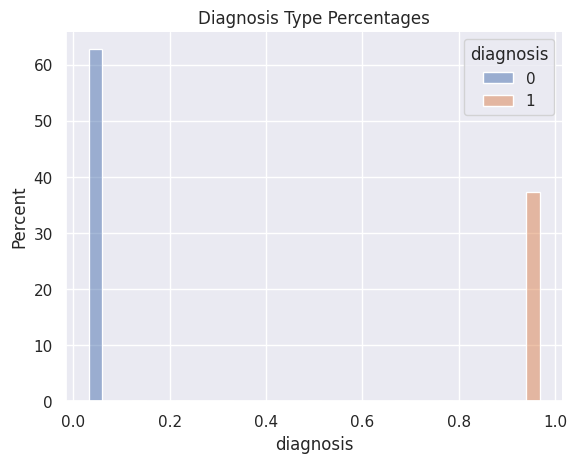

In [21]:
g = sns.histplot(x = 'diagnosis',data = df, hue ='diagnosis', shrink = 0.3, stat = 'percent')
g.set_title("Diagnosis Type Percentages")
sns.despine()

In [22]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [23]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [24]:

df.replace([np.inf, -np.inf], np.nan, inplace=True) 

df.fillna(999, inplace=True)

df.fillna(0, inplace=True)
train_X = train[prediction_var]
train_y = train.diagnosis
test_X= test[prediction_var]
test_y = test.diagnosis

df.isnull().any().any()

df.isnull().any()


id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_w

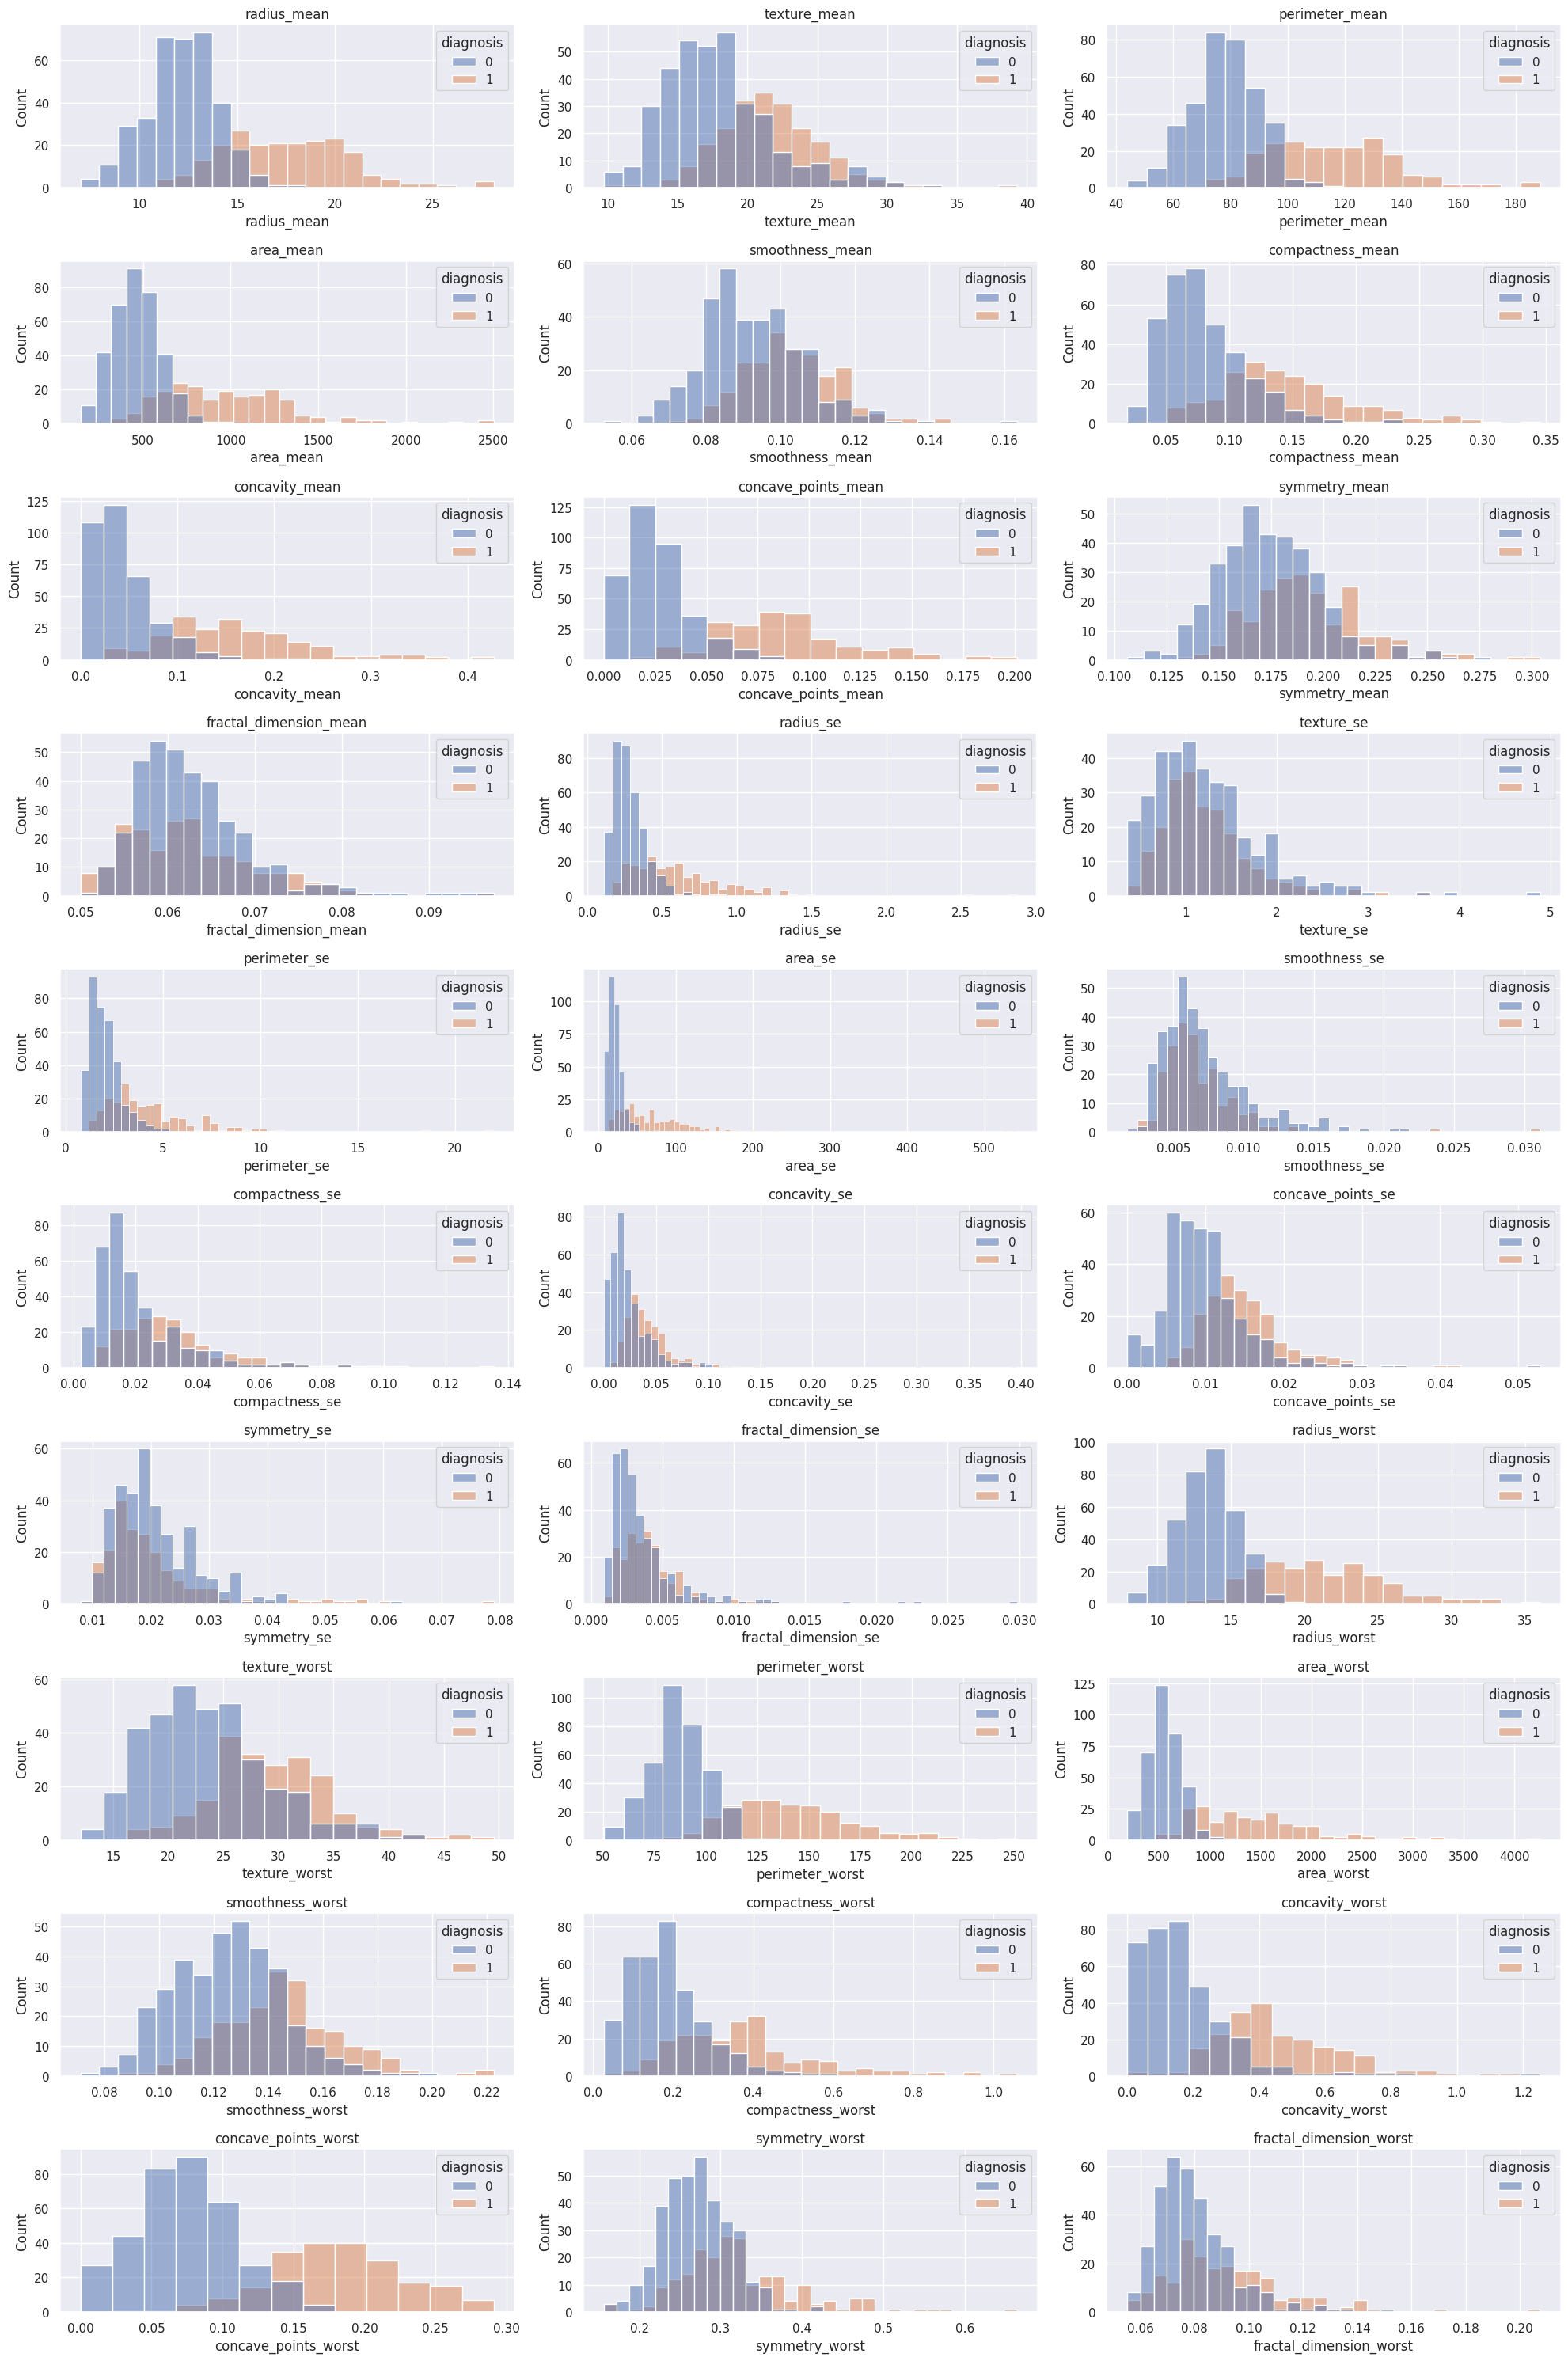

In [25]:
num_list=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
fig = plt.figure(figsize=(20,30))

for i in range(len(num_list)):
    plt.subplot(10,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='diagnosis')

plt.tight_layout()

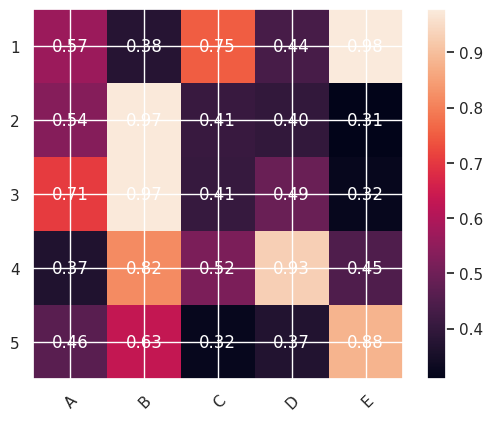

In [46]:
# just learn the orginall idea for heatmap implementation, can see it is a type of data plot function. 
import numpy as np
import matplotlib.pyplot as plt

# Create some random data
data = np.random.rand(5, 5)

# Create a heatmap of the data
fig, ax = plt.subplots()
im = ax.imshow(data)

# Add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the x and y axis tick labels
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])
ax.set_yticklabels(['1', '2', '3', '4', '5'])

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, f'{data[i, j]:.2f}',
                       ha="center", va="center", color="w")

In [34]:
def model(model,data,prediction,outcome):
    kf = KFold(n_splits=10,shuffle=False)

In [35]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output])
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(n_splits=5,shuffle=True, random_state=1)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    print(error)

In [37]:
model = DecisionTreeClassifier()
outcome_var= "diagnosis"
classification_model(model,df,prediction_var,outcome_var)

NameError: ignored

In [ ]:
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)

In [ ]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

In [ ]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

In [ ]:
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

In [ ]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

In [ ]:
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("the best estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    print(clf.best_score_)

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

In [38]:
model = KNeighborsClassifier()
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)


NameError: ignored